In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
datos = pd.read_csv('../datos/netflix_titles.csv', encoding='latin1')

solo_datos = datos.columns[:12]
datos = datos[solo_datos]
datos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Se cambia todo lo que sea menor a "480 min" a "1 Season" asi se maneja los mismo datos

In [54]:
cambiar_duration = lambda x: '1 Season' if isinstance(x, str) and 'min' in x and int(x.split()[0]) < 480 else x

datos['duration'] = datos['duration'].apply(cambiar_duration)

orden_categorias = [
    '1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons',
    '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons',
    '11 Seasons', '12 Seasons', '13 Seasons', '14 Seasons', '15 Seasons',
    '16 Seasons', '17 Seasons', '18 Seasons', '19 Seasons', '20 Seasons'
]

datos['duration'] = pd.Categorical(datos['duration'], categories=orden_categorias, ordered=True)

Histograma de "Duracion de los titulos (peliculas y series)"

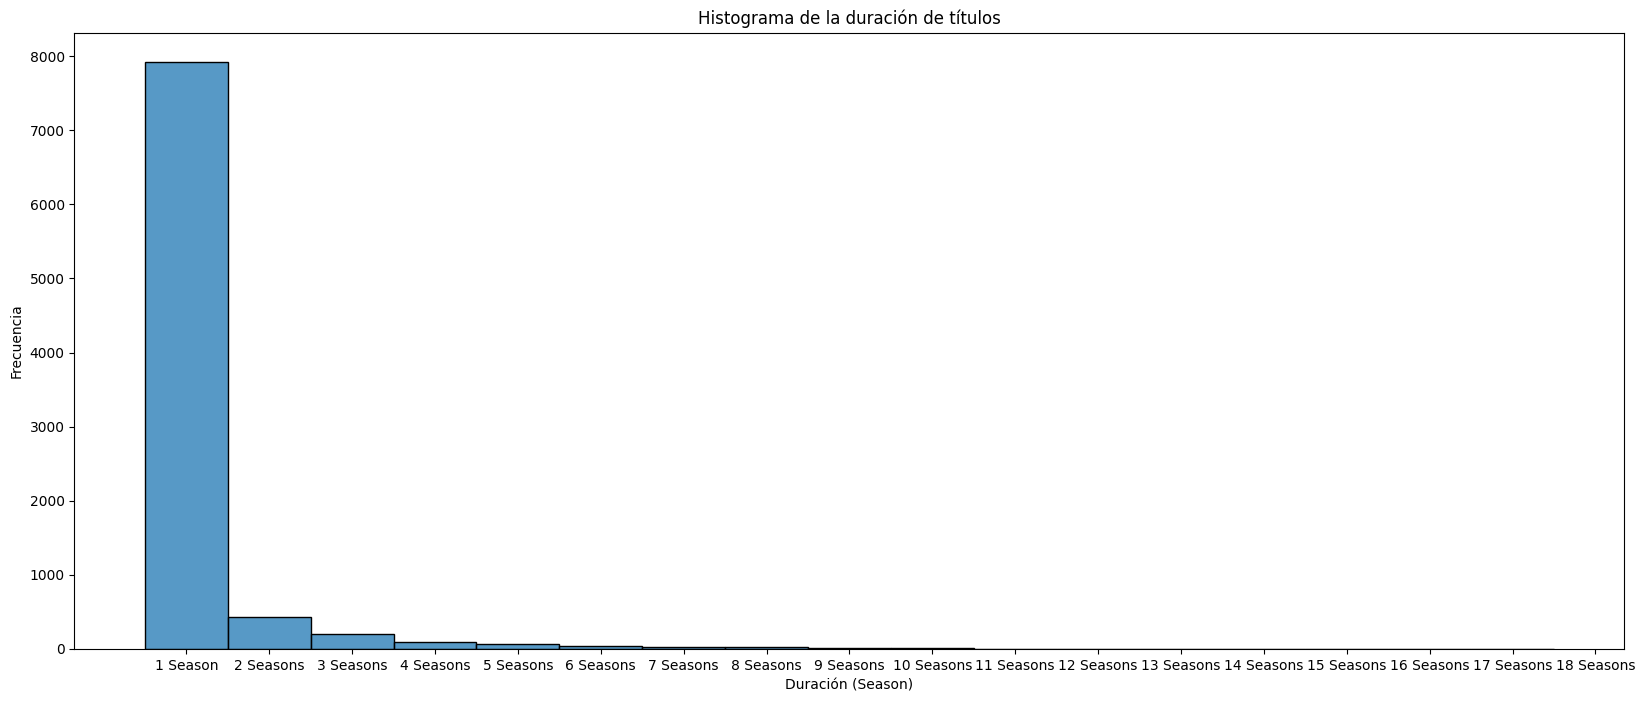

In [55]:
plt.figure(figsize=(20, 8))
sns.histplot(datos['duration'], bins=10)
plt.title('Histograma de la duración de títulos')
plt.xlabel('Duración (Season)')
plt.ylabel('Frecuencia')
plt.show()

Box Plots de "Duracion de los titulos (Peliculas y series)"

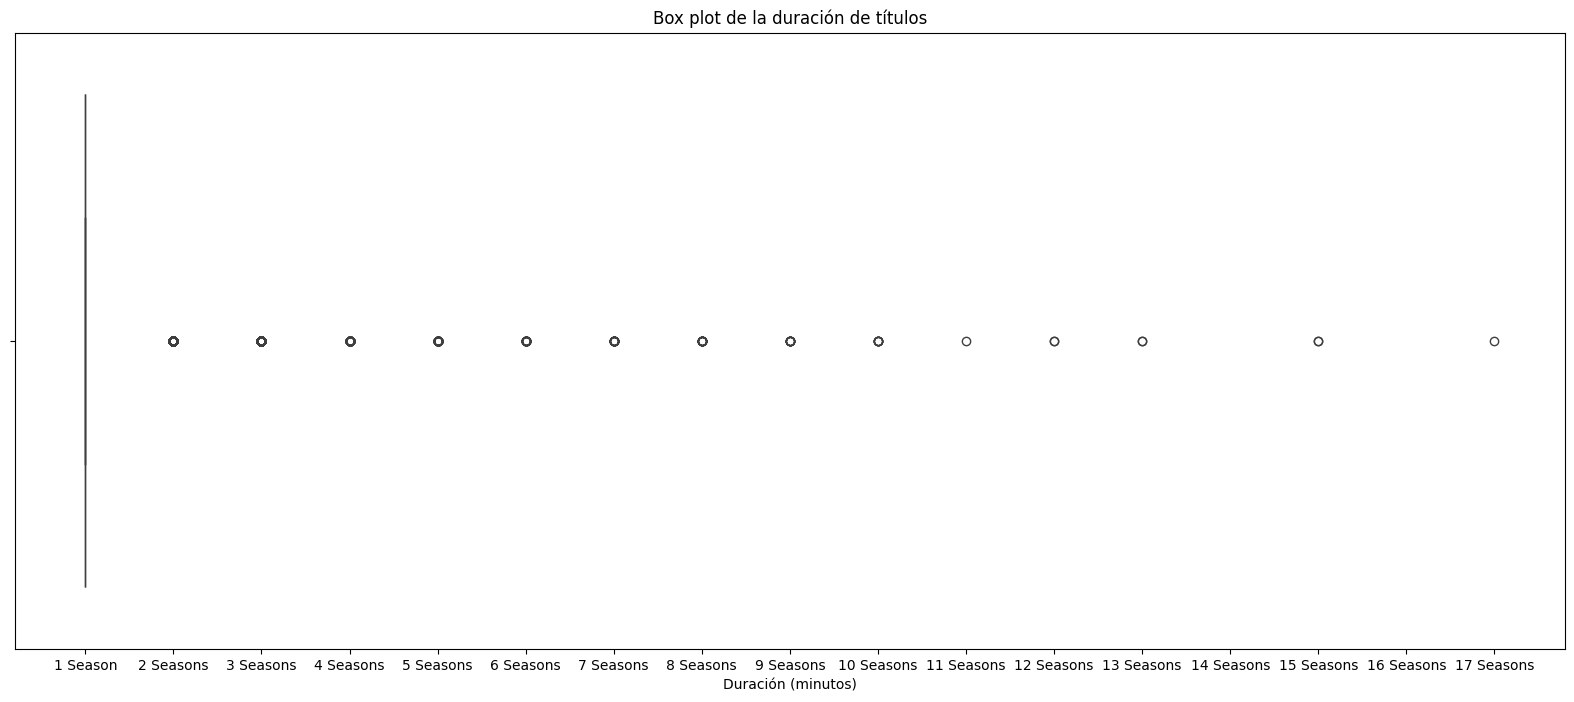

In [40]:
plt.figure(figsize=(20, 8))
sns.boxplot(x=datos['duration'])
plt.title('Box plot de la duración de títulos')
plt.xlabel('Duración (minutos)')
plt.show()

In [59]:
datos['date_added'] = datos['date_added'].astype(str)
datos['year_added'] = datos['date_added'].apply(lambda x: x.split()[-1] if x != 'nan' else 'Unknown')
datos = datos[datos['year_added'] != 'Unknown']

tendencias_por_ano = datos.groupby('year_added').size().reset_index(name='count')


Analasis de Tendencias de "Titulos en funcion del año"

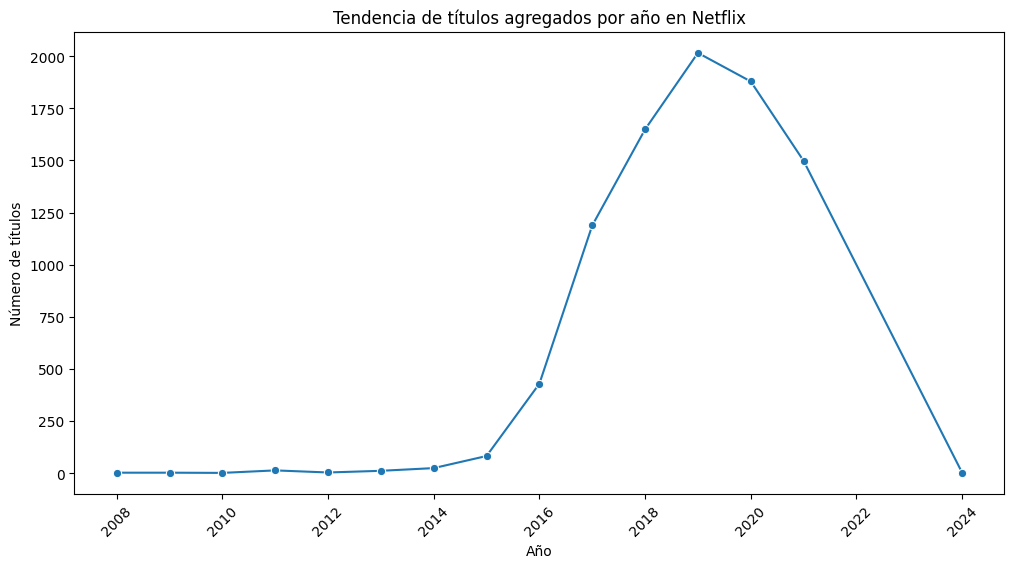

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencias_por_ano, x='year_added', y='count', marker='o')
plt.title('Tendencia de títulos agregados por año en Netflix')
plt.xlabel('Año')
plt.ylabel('Número de títulos')
plt.xticks(rotation=45)
plt.show()